In [1]:
from rubix.core.pipeline import RubixPipeline 
import os
config = {
    "pipeline":{"name": "calc_ifu"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 14,
        "reuse": True,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 500,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-14.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE"},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1},
        
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
    },        
}

pipe = RubixPipeline(config)

data= pipe.run()

2024-05-19 16:52:47,090 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <  
/_/|_|\____/____/___/_/|_|  
                            

2024-05-19 16:52:47,091 - rubix - INFO - Rubix version: 0.0.1.post55+g93a544d
2024-05-19 16:52:47,120 - rubix - INFO - Getting rubix data...
2024-05-19 16:52:47,121 - rubix - INFO - Rubix galaxy file already exists, skipping conversion
2024-05-19 16:52:49,319 - rubix - WARNING - The Subset value is set in config. Using only subset of size 1000
2024-05-19 16:52:49,321 - rubix - INFO - Data loaded with 1000 particles.
2024-05-19 16:52:49,321 - rubix - DEBUG - Data Shape: {'coords': (1000, 3), 'velocities': (1000, 3), 'metallicity': (1000,), 'mass': (1000,), 'age': (1000,)}
2024-05-19 16:52:49,322 - rubix - INFO - Setting up the pipeline...
2024-05-19 16:52:49,323 - rubix - DEBUG - Pipeline Configuration: {'Transformers': {'rotate_galaxy': {'name': 'rotate_galaxy', 'depends_on': None, 'args': [], 'kwargs

rotating galaxy:  face-on


2024-05-19 16:52:50,226 - rubix - DEBUG - Calculation Finished! Spectra shape: (1, 1000, 842)
2024-05-19 16:52:50,227 - rubix - INFO - Scaling Spectra by Mass...
2024-05-19 16:52:50,233 - rubix - DEBUG - Doppler Shifted SSP Wave: (1, 1000, 842)
2024-05-19 16:52:50,234 - rubix - DEBUG - Telescope Wave Seq: (3721,)
E0519 16:52:52.252763  219131 pjrt_stream_executor_client.cc:2809] Execution of replica 0 failed: INTERNAL: Failed to allocate 2977312 bytes for new constant


XlaRuntimeError: INTERNAL: Failed to allocate 2977312 bytes for new constant

In [4]:
from rubix.spectra.ifu import calculate_diff, resample_spectrum
from rubix.core.ifu import get_velocities_doppler_shift_vmap
from rubix.core.ssp import get_ssp
from rubix.core.telescope import get_telescope
import jax.numpy as jnp
ssp = get_ssp(config)
telescope = get_telescope(config)
ssp

/home/ufuk/Dokumente/Research/Masterarbeit/rubix/rubix/telescope/factory.py:21: UserWarning: No telescope config provided, using default stored in /home/ufuk/Dokumente/Research/Masterarbeit/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(


SSPGrid(age=Array([ 0.       ,  5.100002 ,  5.1500006,  5.1999993,  5.25     ,
        5.3000016,  5.350002 ,  5.4000006,  5.4500012,  5.500002 ,
        5.550002 ,  5.600002 ,  5.6500025,  5.700002 ,  5.750002 ,
        5.8000026,  5.850003 ,  5.900003 ,  5.950003 ,  6.       ,
        6.0200005,  6.040001 ,  6.0599985,  6.0799985,  6.100002 ,
        6.120001 ,  6.1399984,  6.16     ,  6.18     ,  6.1999993,
        6.2200007,  6.24     ,  6.2599998,  6.2799997,  6.2999997,
        6.3199987,  6.3399997,  6.3600006,  6.3799996,  6.3999987,
        6.4200006,  6.44     ,  6.4599996,  6.4799995,  6.499999 ,
        6.52     ,  6.539999 ,  6.56     ,  6.5799994,  6.6      ,
        6.6199994,  6.6399994,  6.66     ,  6.679999 ,  6.699999 ,
        6.72     ,  6.7399993,  6.7599993,  6.7799997,  6.799999 ,
        6.819999 ,  6.839999 ,  6.8599997,  6.879999 ,  6.899999 ,
        6.919999 ,  6.939999 ,  6.959999 ,  6.9799986,  6.999999 ,
        7.0200005,  7.040001 ,  7.0599985,  7.0799

In [7]:
spectrum = ssp.flux[0,0]
target_wavelength = telescope.wave_seq

resample_spectrum(spectrum, ssp.wavelength, target_wavelength)

Initial Wavelength [   91.    94.    96.    98.   100.   102.   104.   106.   108.   110.
   114.   118.   121.   125.   127.   128.   131.   132.   134.   137.
   140.   143.   147.   151.   155.   159.   162.   166.   170.   173.
   177.   180.   182.   186.   191.   194.   198.   202.   205.   210.
   216.   220.   223.   227.   230.   234.   240.   246.   252.   257.
   260.   264.   269.   274.   279.   284.   290.   296.   301.   308.
   318.   328.   338.   348.   357.   366.   375.   385.   395.   405.
   414.   422.   430.   441.   451.   460.   470.   480.   490.   500.
   506.   512.   520.   530.   540.   550.   560.   570.   580.   590.
   600.   610.   620.   630.   640.   650.   658.   665.   675.   685.
   695.   705.   716.   726.   735.   745.   755.   765.   775.   785.
   795.   805.   815.   825.   835.   845.   855.   865.   875.   885.
   895.   905.   915.   925.   935.   945.   955.   965.   975.   985.
   995.  1005.  1015.  1025.  1035.  1045.  1055.  1065.  

Array([0.00412338, 0.00412025, 0.00411712, ..., 0.00032077, 0.00032056,
       0.00032037], dtype=float32)

In [14]:
doppler_shift = get_velocities_doppler_shift_vmap(ssp.wavelength,"y")

In [15]:
velocities = jnp.array([[1,2,3],[4,5,6],[7,8,9]])

In [16]:
doppler_shift(velocities)

ValueError: Got wrong shapes.

In [2]:
from rubix.spectra.ifu import get_velocity_component
import jax.numpy as jnp

array = jnp.array([[1,2,3],[4,5,6],[7,8,9]])
direction = "y"
x = get_velocity_component(array, direction)
x.size

3

In [3]:
x

Array([2, 5, 8], dtype=int32)

In [7]:
assert x.size == 3, "Error in velocity component calculation"

AssertionError: Error in velocity component calculation

In [1]:
from rubix import config 
config.keys()

dict_keys(['constants', 'logger', 'IllustrisAPI', 'IllustrisHandler', 'BaseHandler', 'ssp', 'ifu'])

In [ ]:
import jax 
import jax.numpy as jnp
# Create a function to calculate a single IFU cube
def calculate_ifu_cube(stars_spectra, pixel_indices):
    # Create an IFU cube of shape (25*25, 842)
    #ifu_cube = jnp.zeros((25 * 25, 842))
    
    # Use jax.ops.segment_sum to sum the spectra into the IFU cube based on pixel indices
    ifu_cube = jax.ops.segment_sum(stars_spectra, pixel_indices, num_segments=25*25)
    
    # Reshape the IFU cube to the desired shape (25, 25, 842)
    ifu_cube = ifu_cube.reshape((25, 25, 842))
    
    return ifu_cube

spectra = data["spectra"]
assignments = data["pixel_assignment"]

# Calculate 4 individual IFU cubes
ifu_cubes = jax.vmap(calculate_ifu_cube)(spectra, assignments)

# Sum the 4 IFU cubes
final_ifu_cube = jnp.sum(ifu_cubes, axis=0)
final_ifu_cube.shape

(25, 25, 842)

In [ ]:
ssp = pipe.ssp
wavelengths = ssp.wavelength

# get the indices of the visible wavelengths of 4000-8000 Angstroms

visible_indices = jnp.where((wavelengths >= 4000) & (wavelengths <= 8000))



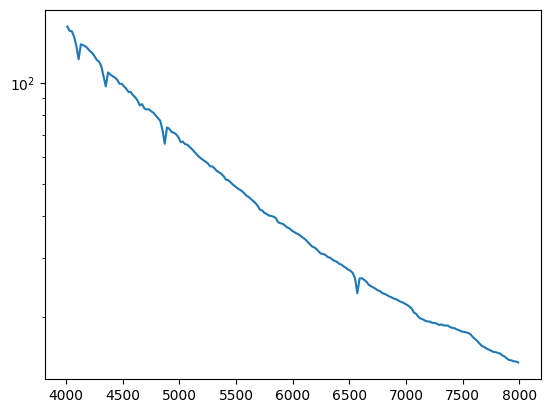

In [ ]:
# plot example spectrum
import matplotlib.pyplot as plt

spec = final_ifu_cube[12, 12]

plt.plot(wavelengths[visible_indices], spec[visible_indices])
plt.yscale("log")

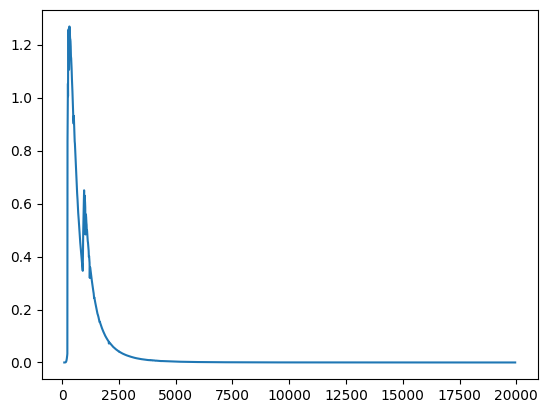

In [ ]:
plt.plot(wavelengths,ssp.flux[0,0])

In [ ]:
visible_indices[0].shape

(200,)

In [ ]:
# get the spectra of the visible wavelengths from the ifu cube
visible_spectra = final_ifu_cube[:, :, visible_indices[0]]
visible_spectra.shape

(25, 25, 200)

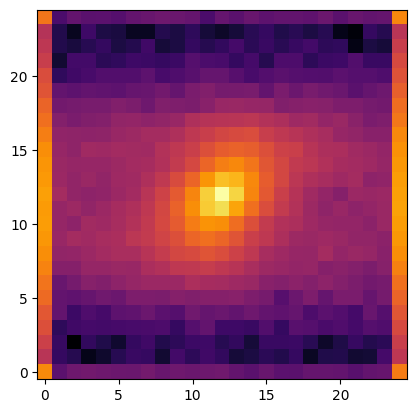

In [ ]:
# Sum up all spectra to create an image
image = jnp.sum(visible_spectra, axis = 2)
image = jnp.log10(image + 1)
plt.imshow(image, origin="lower", cmap="inferno")